# Analyzing Results of the 'Optimization' phase

## Importing dataset and modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../Datasets/length_optimization_output.csv')

In [4]:
df.head()

,IMPACT,SUBSTANCE,APPROPRIATENESS,SOUNDNESS_CORRECTNESS,ORIGINALITY,RECOMMENDATION,CLARITY,REVIEWER_CONFIDENCE,comments,strengths,...,weakness_word_count,discussion_word_count,normalized_length,unique_key_points,information_density,unique_insights_per_word,optimization_score,composite_score,review_quality,adjusted_argument_strength
0,0.6,0.8,1.0,0.8,0.6,0.6,0.6,0.6,- Strengths:\n* Outperforms ALIGN in supervise...,* Outperforms ALIGN in supervised entity linki...,...,167,0,0.157967,3,0.013043,18.991304,0.143186,3.474115,Poor,0.073401
1,0.6,0.8,1.0,0.8,0.6,0.8,0.6,0.8,This paper addresses the problem of disambigua...,No information available,...,0,0,0.497253,7,0.009669,14.077348,-0.031610,5.827519,Moderate,0.017836
2,0.6,0.8,0.8,0.8,0.6,0.8,0.6,0.8,"- Strengths:\nGood ideas, simple neural learni...","Good ideas, simple neural learning, interestin...",...,0,0,0.208104,3,0.009901,14.415842,0.099582,2.552753,Poor,0.034617
3,0.6,0.8,1.0,0.8,0.6,0.6,1.0,0.8,- Strengths:\nThe idea of hard monotonic atten...,The idea of hard monotonic attention is new an...,...,46,133,0.136676,2,0.010050,14.633166,0.132916,3.615575,Poor,0.067018
4,0.6,0.8,1.0,0.8,0.6,0.6,1.0,0.6,- Strengths: A new encoder-decoder model is pr...,No information available,...,0,848,0.609203,9,0.010147,14.773393,-0.070128,18.261790,Excellent,0.012103


In [5]:
df.columns

Index(['IMPACT', 'SUBSTANCE', 'APPROPRIATENESS', 'SOUNDNESS_CORRECTNESS',
       'ORIGINALITY', 'RECOMMENDATION', 'CLARITY', 'REVIEWER_CONFIDENCE',
       'comments', 'strengths', 'weaknesses', 'general_discussion',
       'content_relevance', 'evidence_support', 'strength_argument_score',
       'weakness_argument_score', 'argument_strength', 'readability_index',
       'sentence_complexity', 'technical_depth', 'total_word_count',
       'strength_word_count', 'weakness_word_count', 'discussion_word_count',
       'normalized_length', 'unique_key_points', 'information_density',
       'unique_insights_per_word', 'optimization_score', 'composite_score',
       'review_quality', 'adjusted_argument_strength'],
      dtype='object')

## Qualitative Analysis

In [6]:
print("Variance of composite_score:", df['composite_score'].var())
print("Variance of normalized_length:", df['normalized_length'].var())
print("Variance of unique_insights_per_word:", df['unique_insights_per_word'].var())

Variance of composite_score: 15.787757649485066
Variance of normalized_length: 0.03136698619612166
Variance of unique_insights_per_word: 17.67402341401872


In [7]:
print(df[['content_relevance', 'argument_strength', 'readability_index', 'composite_score']].head())

   content_relevance  argument_strength  readability_index  composite_score
0           0.639224           0.954207              44.34         3.474115
1           0.804816           0.677765              51.68         5.827519
2           0.611154           0.830803              58.28         2.552753
3           0.840461           0.871229              46.47         3.615575
4           0.670860           0.677765              55.44        18.261790


In [8]:
print("Normalized Length Min:", df['normalized_length'].min())
print("Normalized Length Max:", df['normalized_length'].max())
print(df['total_word_count'].describe())

Normalized Length Min: 0.0528846153846153
Normalized Length Max: 1.0
count     248.000000
mean      422.028226
std       257.868190
min        77.000000
25%       220.000000
50%       360.000000
75%       542.000000
max      1456.000000
Name: total_word_count, dtype: float64


In [9]:
print("Unique Insights per Word - Example Rows:")
print(df[['unique_key_points', 'normalized_length', 'unique_insights_per_word']].head())

Unique Insights per Word - Example Rows:
   unique_key_points  normalized_length  unique_insights_per_word
0                  3           0.157967                 18.991304
1                  7           0.497253                 14.077348
2                  3           0.208104                 14.415842
3                  2           0.136676                 14.633166
4                  9           0.609203                 14.773393


In [10]:
print(df['review_quality'].value_counts())

review_quality
Poor         136
Moderate      89
Excellent     23
Name: count, dtype: int64


In [11]:
print("Composite Score Min:", df['composite_score'].min())
print("Composite Score Max:", df['composite_score'].max())
print(df['composite_score'].describe())

Composite Score Min: 0.8328477611940299
Composite Score Max: 21.74276433915212
count    248.000000
mean       5.219214
std        3.973381
min        0.832848
25%        2.498028
50%        4.163070
75%        6.660067
max       21.742764
Name: composite_score, dtype: float64


In [12]:
print(df[['content_relevance', 'argument_strength', 'readability_index']].describe())

       content_relevance  argument_strength  readability_index
count         248.000000         248.000000         248.000000
mean            0.663834           0.843564          49.542661
std             0.136947           0.150145           9.227391
min             0.074539           0.677765          22.110000
25%             0.605858           0.677765          44.672500
50%             0.686281           0.905272          50.700000
75%             0.754453           0.997368          55.240000
max             0.899715           0.999778          75.300000


In [13]:
for quality in ['Poor', 'Moderate', 'Excellent']:
    sample = df[df['review_quality'] == quality].sample(1, random_state=42)
    print(f"\nExample of {quality}:")
    print(sample[['composite_score', 'normalized_length', 'unique_insights_per_word', 'comments']], end="\n\n\n\n")


Example of Poor:
     composite_score  normalized_length  unique_insights_per_word  \
145         4.447144           0.289835                 10.350711   

                                              comments  
145  - Strengths:\n\nWell-written.\n\n- Weaknesses:...  




Example of Moderate:
     composite_score  normalized_length  unique_insights_per_word  \
111         10.03197            0.51717                 11.601594   

                                              comments  
111  The paper describes a deep-learning-based mode...  




Example of Excellent:
     composite_score  normalized_length  unique_insights_per_word  \
147        12.393854           0.528159                   9.46684   

                                              comments  
147  - Update after rebuttal\n\nI appreciate the au...  





## Quantitative Analysis

In [14]:
print("Composite Score Statistics:")
print(df['composite_score'].describe())

print("\nNormalized Length Statistics:")
print(df['normalized_length'].describe())

print("\nUnique Insights per Word Statistics:")
print(df['unique_insights_per_word'].describe())

Composite Score Statistics:
count    248.000000
mean       5.219214
std        3.973381
min        0.832848
25%        2.498028
50%        4.163070
75%        6.660067
max       21.742764
Name: composite_score, dtype: float64

Normalized Length Statistics:
count    248.000000
mean       0.289855
std        0.177107
min        0.052885
25%        0.151099
50%        0.247253
75%        0.372253
max        1.000000
Name: normalized_length, dtype: float64

Unique Insights per Word Statistics:
count    248.000000
mean      13.756296
std        4.204048
min        4.969283
25%       10.594871
50%       13.607477
75%       16.440634
max       26.352941
Name: unique_insights_per_word, dtype: float64


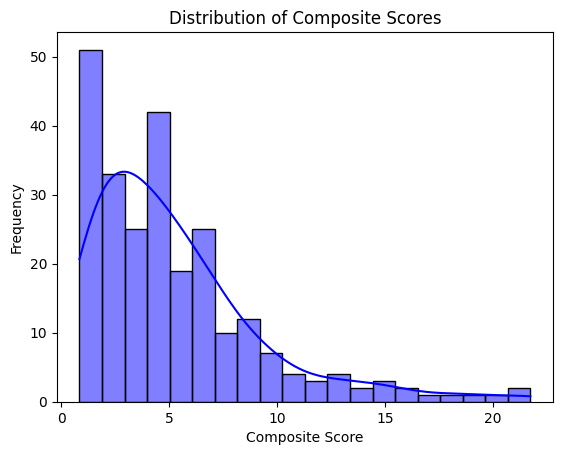

In [15]:
sns.histplot(df['composite_score'], kde=True, bins=20, color='blue')
plt.title('Distribution of Composite Scores')
plt.xlabel('Composite Score')
plt.ylabel('Frequency')
plt.show()

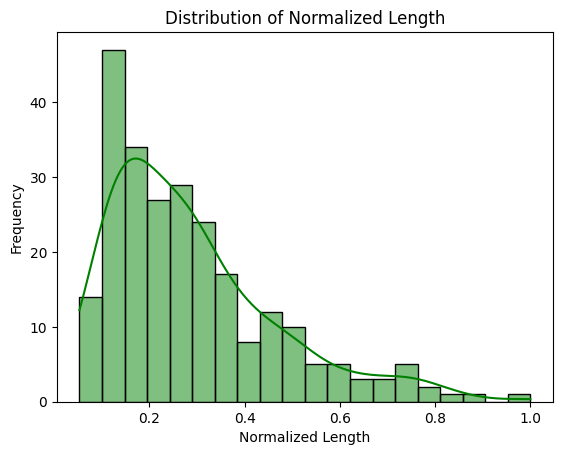

In [16]:
sns.histplot(df['normalized_length'], kde=True, bins=20, color='green')
plt.title('Distribution of Normalized Length')
plt.xlabel('Normalized Length')
plt.ylabel('Frequency')
plt.show()

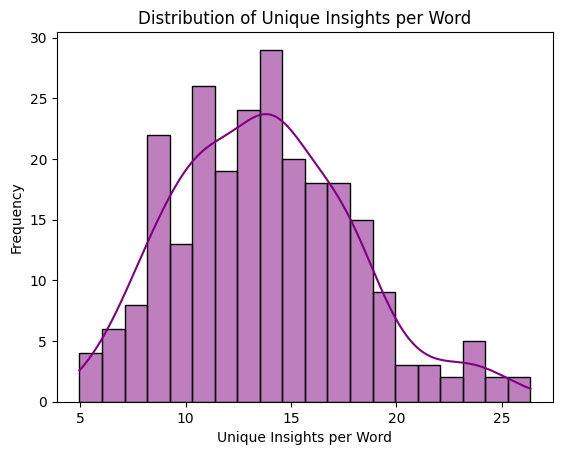

In [17]:
sns.histplot(df['unique_insights_per_word'], kde=True, bins=20, color='purple')
plt.title('Distribution of Unique Insights per Word')
plt.xlabel('Unique Insights per Word')
plt.ylabel('Frequency')
plt.show()

In [18]:
review_quality_counts = df['review_quality'].value_counts()
print("\nReview Quality Distribution:")
print(review_quality_counts)


Review Quality Distribution:
review_quality
Poor         136
Moderate      89
Excellent     23
Name: count, dtype: int64


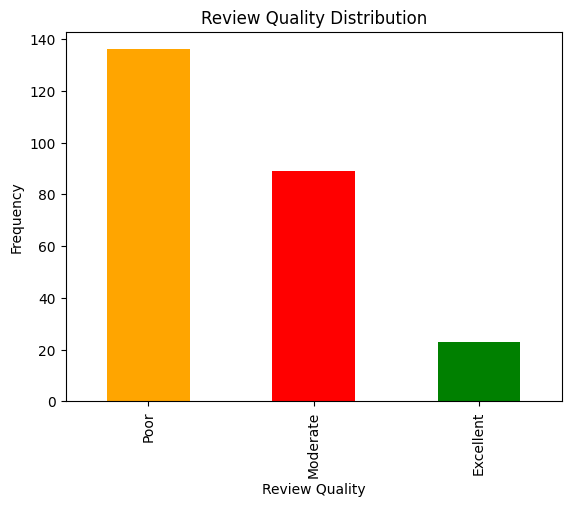

In [19]:
review_quality_counts.plot(kind='bar', color=['orange', 'red', 'green'])
plt.title('Review Quality Distribution')
plt.xlabel('Review Quality')
plt.ylabel('Frequency')
plt.show()

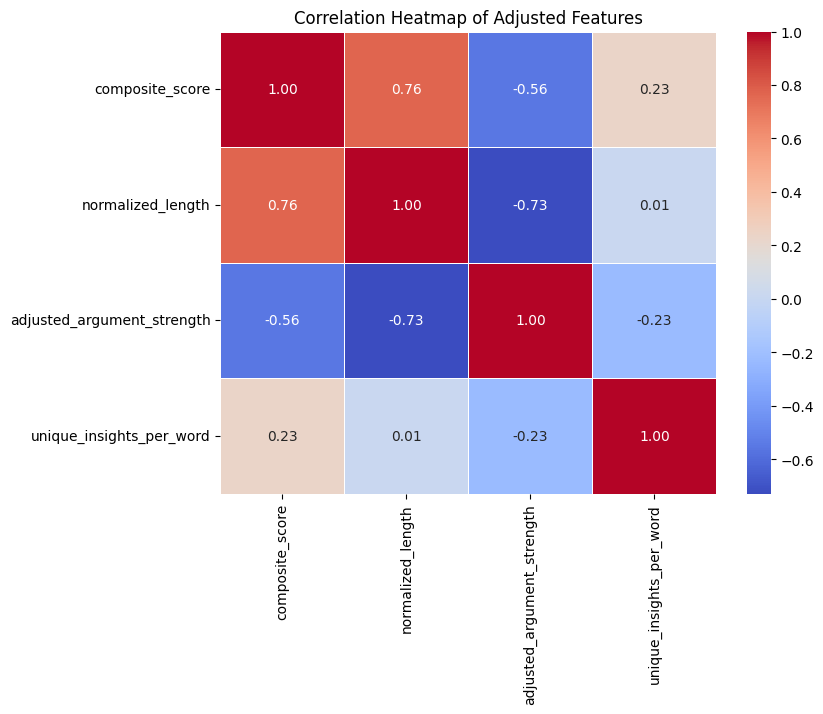

In [20]:
correlation_cols = ['composite_score', 'normalized_length', 'adjusted_argument_strength', 'unique_insights_per_word']
corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Adjusted Features")
plt.show()

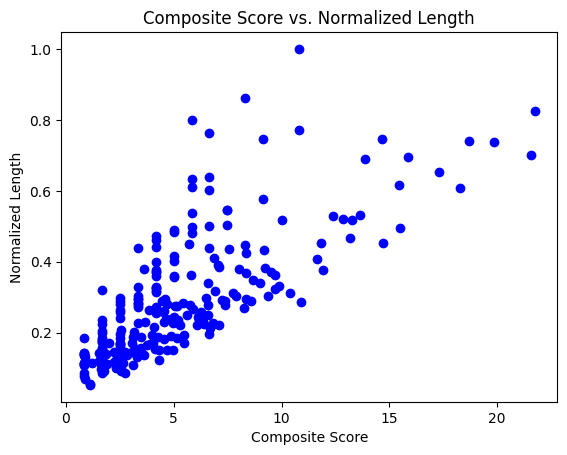

In [21]:

plt.scatter(df['composite_score'], df['normalized_length'], color='blue')
plt.xlabel('Composite Score')
plt.ylabel('Normalized Length')
plt.title('Composite Score vs. Normalized Length')
plt.show()

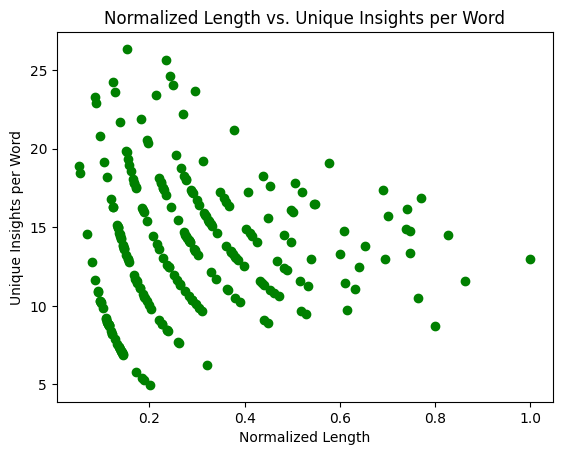

In [22]:
plt.scatter(df['normalized_length'], df['unique_insights_per_word'], color='green')
plt.xlabel('Normalized Length')
plt.ylabel('Unique Insights per Word')
plt.title('Normalized Length vs. Unique Insights per Word')
plt.show()

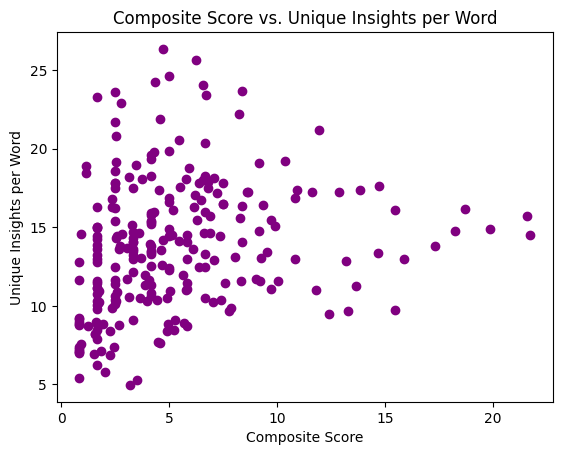

In [23]:
plt.scatter(df['composite_score'], df['unique_insights_per_word'], color='purple')
plt.xlabel('Composite Score')
plt.ylabel('Unique Insights per Word')
plt.title('Composite Score vs. Unique Insights per Word')
plt.show()

C:\Users\TIRATH BHATHAWALA\AppData\Local\Temp\ipykernel_27852\593963532.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_quality', y='composite_score', data=df, palette='Set2')


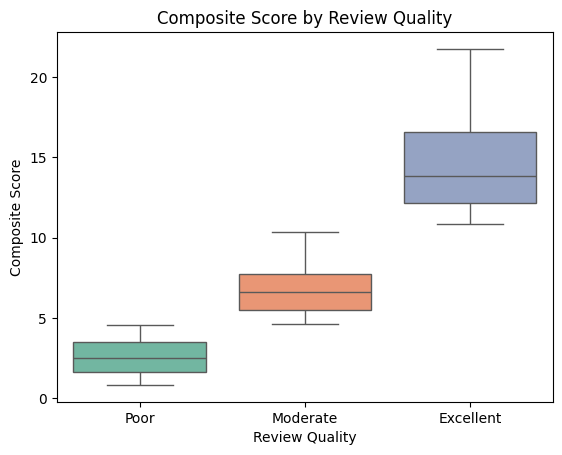

In [24]:
sns.boxplot(x='review_quality', y='composite_score', data=df, palette='Set2')
plt.title('Composite Score by Review Quality')
plt.xlabel('Review Quality')
plt.ylabel('Composite Score')
plt.show()

C:\Users\TIRATH BHATHAWALA\AppData\Local\Temp\ipykernel_27852\4249625014.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_quality', y='unique_insights_per_word', data=df, palette='Set2')


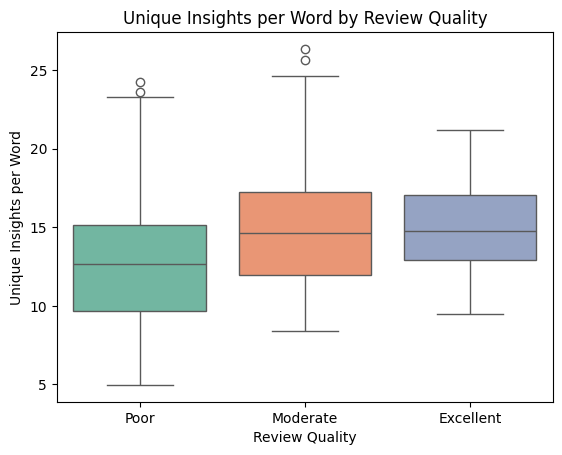

In [25]:
sns.boxplot(x='review_quality', y='unique_insights_per_word', data=df, palette='Set2')
plt.title('Unique Insights per Word by Review Quality')
plt.xlabel('Review Quality')
plt.ylabel('Unique Insights per Word')
plt.show()

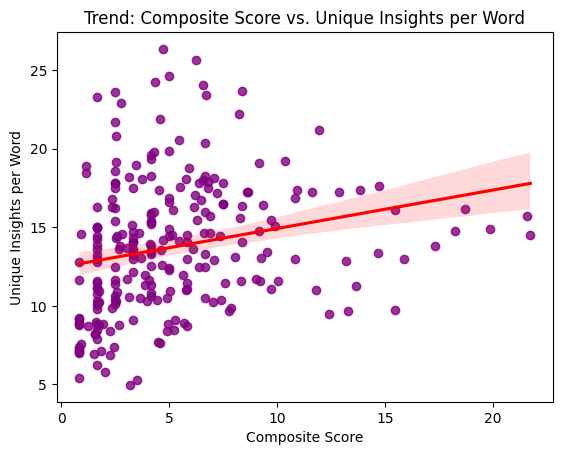

In [26]:
sns.regplot(x='composite_score', y='unique_insights_per_word', data=df, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.title('Trend: Composite Score vs. Unique Insights per Word')
plt.xlabel('Composite Score')
plt.ylabel('Unique Insights per Word')
plt.show()

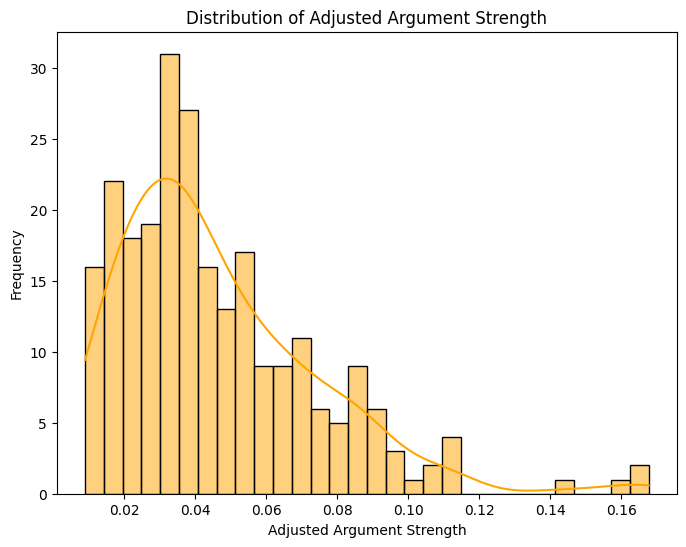

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df['adjusted_argument_strength'], kde=True, bins=30, color='orange')
plt.title("Distribution of Adjusted Argument Strength")
plt.xlabel("Adjusted Argument Strength")
plt.ylabel("Frequency")
plt.show()